In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from filters import low_pass_filter, high_pass_filter, denoise_signal, sinewave_shift, drop_data, count_peaks
import pandas as pd
import pyarrow.parquet as pq
import os
from visualization import plot_phase_time, plot_specto, plot_phase_sample, plot_wavelet, save_specto

In [3]:
# Import the traing dataset into a pandas dataframe (takes 1-2 minutes)
test = pq.read_pandas('data/test.parquet').to_pandas()

In [4]:
test.info();
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 20337 entries, 8712 to 29048
dtypes: int8(20337)
memory usage: 15.2 GB


,8712,8713,8714,8715,8716,8717,8718,8719,8720,8721,...,29039,29040,29041,29042,29043,29044,29045,29046,29047,29048
0,15,-20,3,11,1,-22,-15,-11,20,-7,...,-15,14,-21,4,19,-14,-4,-10,-8,14
1,15,-20,3,11,1,-21,-16,-12,19,-7,...,-15,14,-20,4,20,-14,-5,-10,-8,14
2,14,-21,2,14,2,-20,-14,-9,20,-9,...,-12,14,-19,4,20,-14,-4,-10,-8,14
3,14,-21,2,13,1,-22,-14,-8,22,-7,...,-13,14,-19,5,19,-14,-5,-10,-8,14
4,15,-20,3,11,2,-22,-12,-6,24,-8,...,-17,14,-20,4,19,-14,-5,-10,-8,15


In [5]:
# Import the training metadata from csv
test_meta = pd.read_csv('data/metadata_test.csv')
test_meta.head(10)

,signal_id,id_measurement,phase
0,8712,2904,0
1,8713,2904,1
2,8714,2904,2
3,8715,2905,0
4,8716,2905,1
5,8717,2905,2
6,8718,2906,0
7,8719,2906,1
8,8720,2906,2
9,8721,2907,0


In [58]:
signal_id = 10001

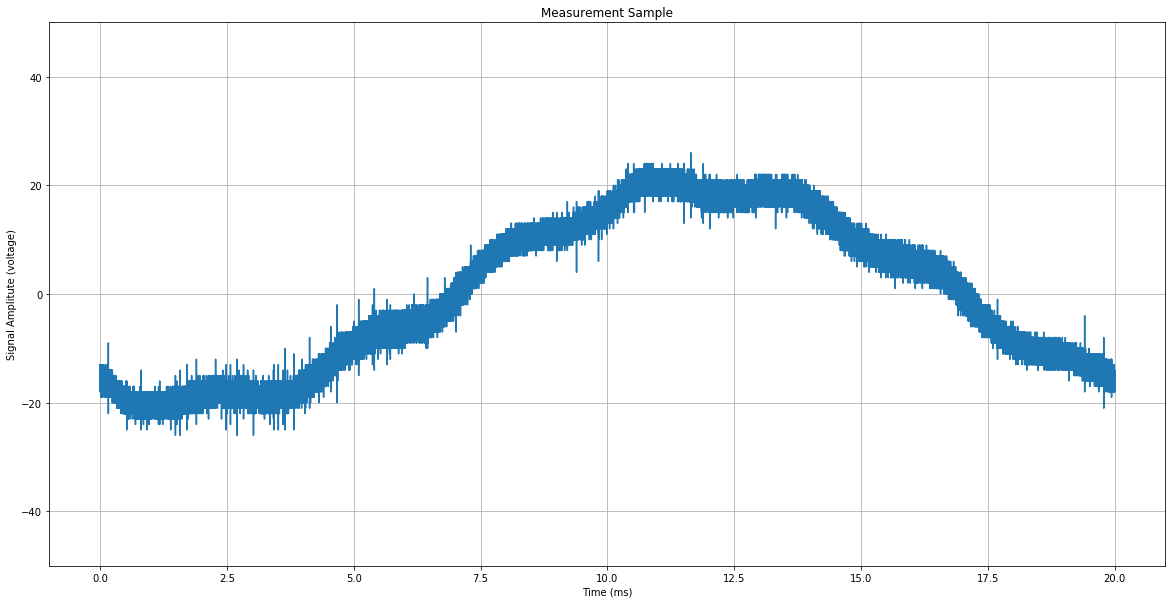

In [59]:
plot_phase_time(test[str(signal_id)])

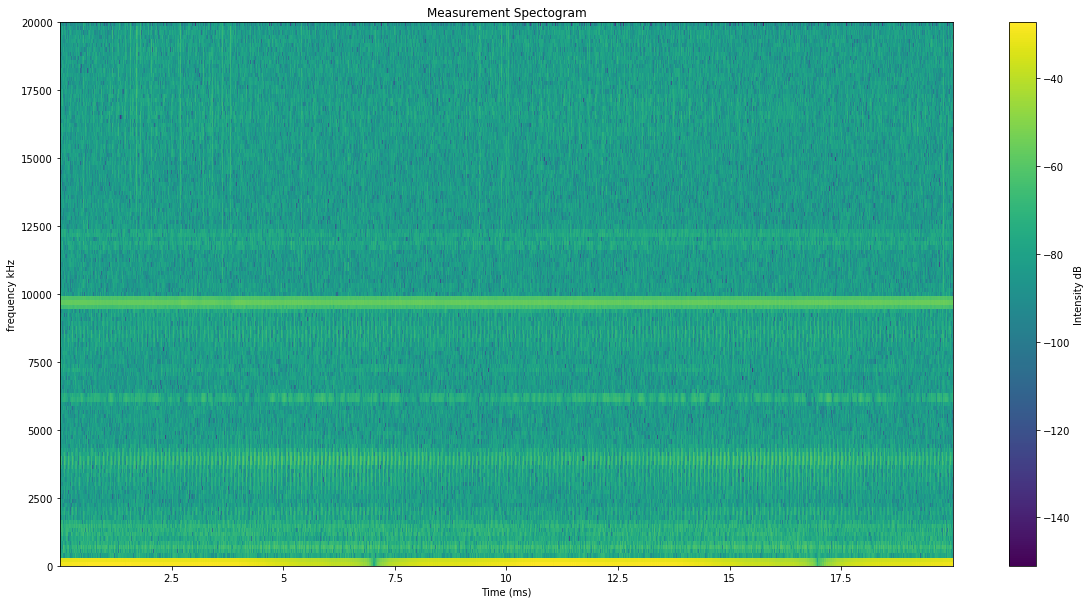

In [60]:
plot_specto(test[str(signal_id)])

In [61]:
new_wave, cutpoint = sinewave_shift(test[str(signal_id)])

In [62]:
def plot_original_and_denoised(data):
    non_filtered_signal = data
    hp_filtered_signal = high_pass_filter(non_filtered_signal)
    denoised_sig = denoise_signal(hp_filtered_signal)
    
    plot_phase_time(non_filtered_signal)
    plot_phase_time(denoised_sig)
    
    return hp_filtered_signal, denoised_sig

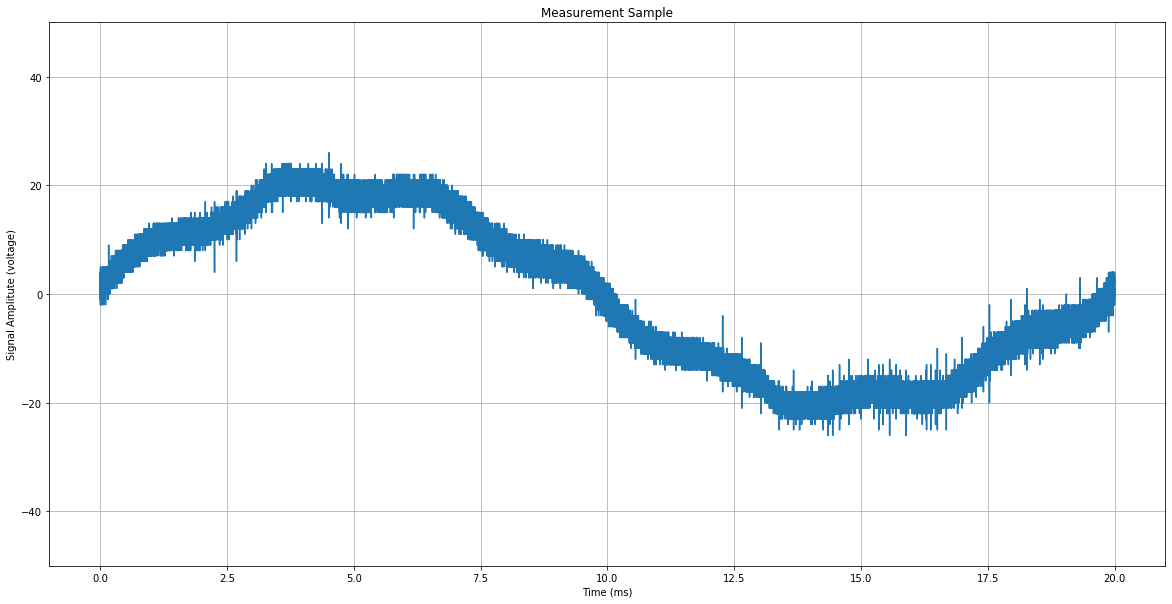

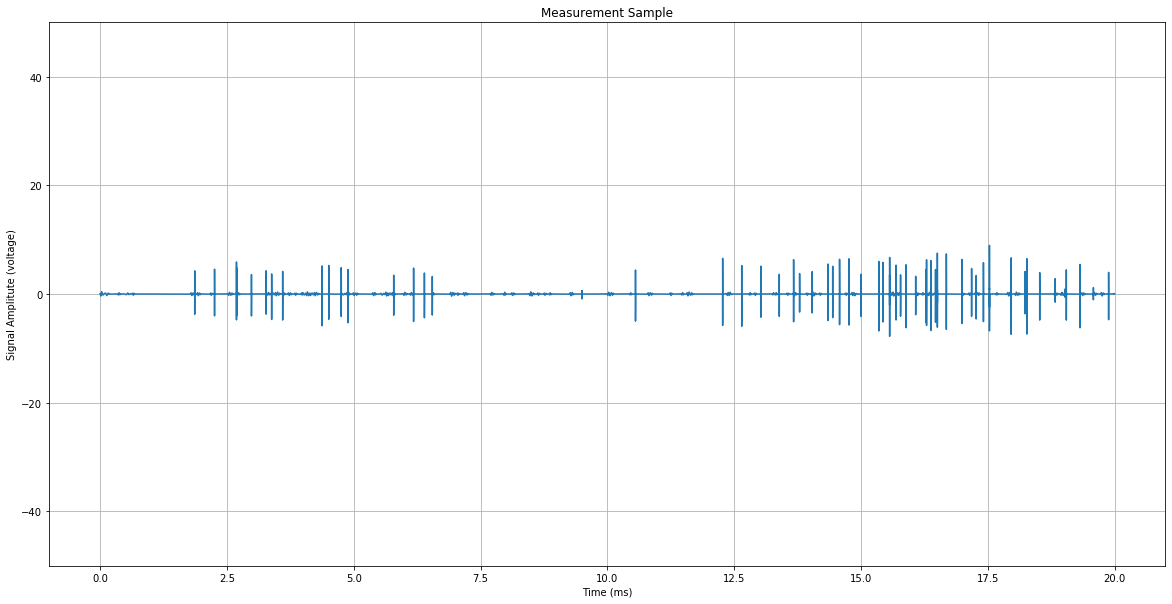

In [63]:
hp_filtered_signal, denoised_sig = plot_original_and_denoised(new_wave)

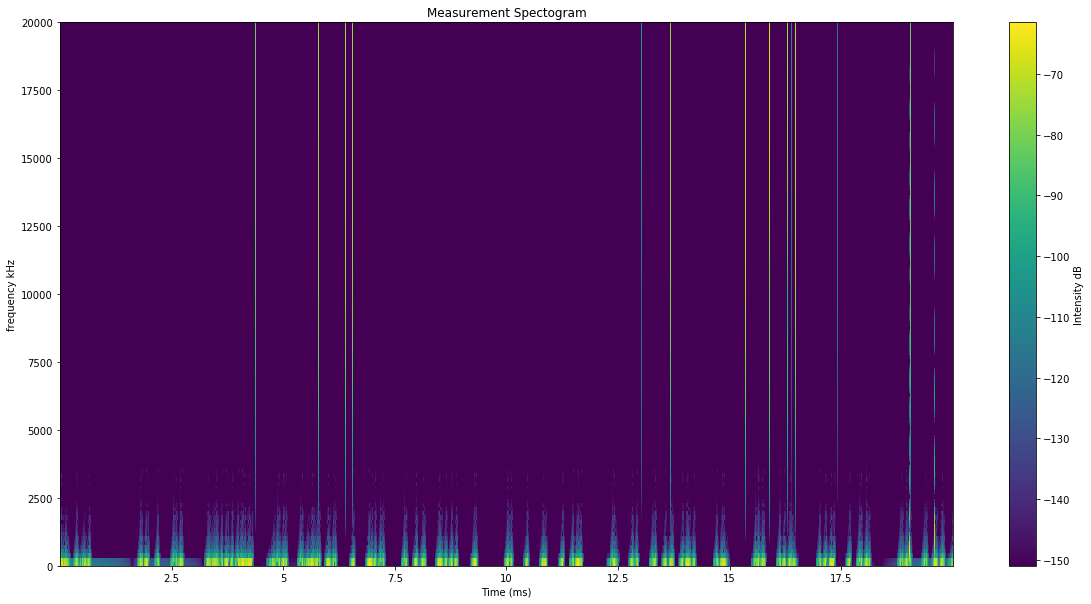

In [64]:
plot_specto(denoised_sig)

In [65]:
cut_data = drop_data(denoised_sig)

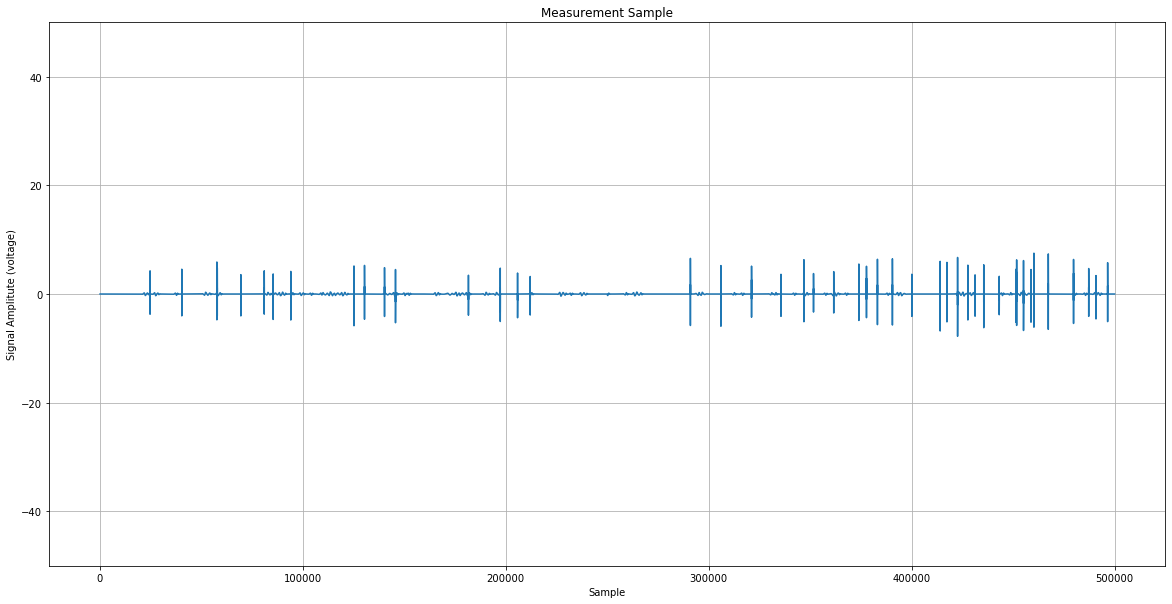

In [66]:
plot_phase_sample(cut_data)

In [67]:
count_peaks(cut_data, threshold=1)

201

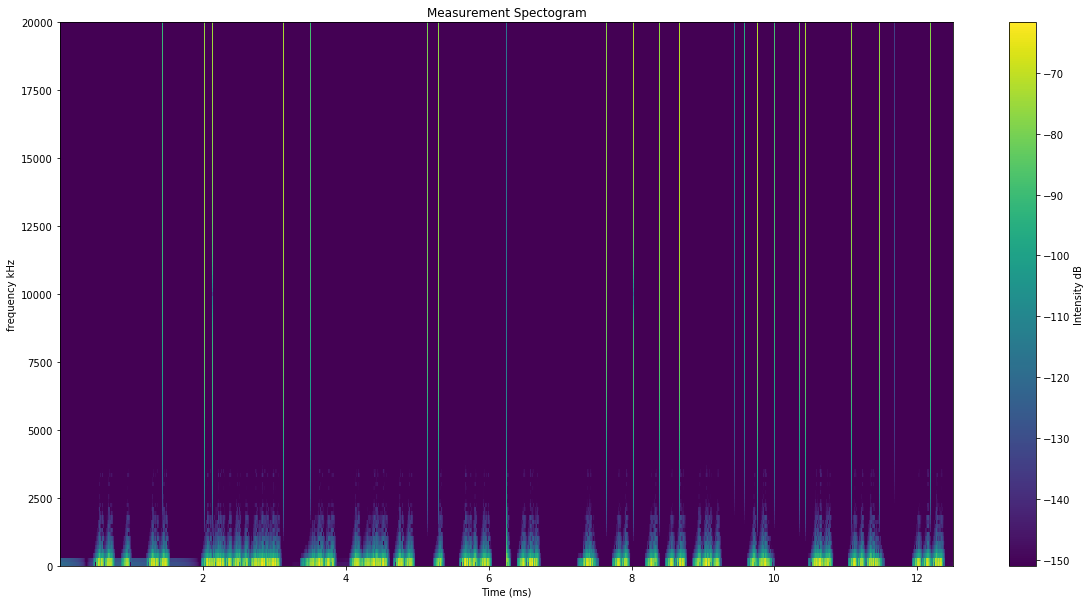

In [68]:
plot_specto(cut_data)

In [71]:
save_specto(cut_data, filepath='experiments', filename='test_saved_spectogram.png')